In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joypy import joyplot
from scipy.spatial.distance import pdist, squareform
import geopandas as gpd
from geodatasets import get_path
import seaborn as sns
#import branca.colormap as cm
from warnings import filterwarnings
filterwarnings('ignore')


In [27]:
df = pd.read_csv('training_data.csv')

## Part I: Descriptive Analysis

a) Check out this page: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Ohio. In around 250
words, summarize the Covid-19 experience of Ohio. Specifically, focus on how Ohio is different or
similar to other US states in terms of the intensity of the pandemic (i), the time and the content
of the different policies that have been implemented (ii), and if Wikipedia ‘thinks’ Ohio has dealt
with Covid-19 successfully (or not) (iii)

hio’s first case of COVID-19 was reported on March 9, 2020 and the first death was 10 days later. The virus spread fastest in densely populated counties and areas with airports, consistent with global patterns. Although Ohio wasn't among the hardest-hit states initially, it eventually recorded over 3.9 million cases and nearly 45,000 deaths by March 2025. Similar to other states, vulnerable populations—particularly racial and ethnic minorities and individuals with underlying health conditions—were disproportionately affected.

Ohio’s policy response aligned with many other states. In March 2020, the state took early action by banning large gatherings, closing schools and non-essential businesses, and issuing a stay-at-home order. Mask mandates were later introduced for indoor public spaces. Ohio gradually reopened through phased guidelines, balancing economic activity with health precautions. Vaccinations began in August 2020, following federal prioritization strategies. The state also introduced a vaccine lottery to encourage participation. In June 2021, Ohio lifted statewide public health orders, and by May 2023, began integrating COVID-19 management into regular healthcare.

Assessments of Ohio’s handling of the pandemic are mixed. Early action and interventions by governor DeWine may have slowed the initial spread as compared to states of similar sizes like Michigan, Illinois and Pennsylvania, Ohio’s had fewer deaths and cases. However, there was a lot of uproar from republican parties about the policy changes.

b) Find the average values for all the topic awareness variables. Create a bar chart that shows the
average normalized Jaccard similarity-based awareness values for all different types of awareness
topics listed above. Order the bars from the biggest to the smallest. Summarize your observations
in around 100 words.

In [28]:
#df.columns.tolist()

In [29]:
awareness_df = df.drop(['county','cases', 'deaths', 'date_index_converted', 'county_data_length', 'total_pop',
'percent_25_34', 'percent_highschool', 'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
 'median_household_earnings', 'median_worker_earnings', 'percent_insured', 'percent_married', 'poverty_rate',
 'median_property_value', 'percent_white'], axis = 1)

In [30]:
#awareness_df.columns.tolist()

In [31]:
awareness_avg = awareness_df.mean()

In [32]:
jacc_avg = awareness_avg[awareness_avg.index.str.contains('jaccard_normalized')].sort_values(ascending=False)
#len(jacc_avg) #21 columns

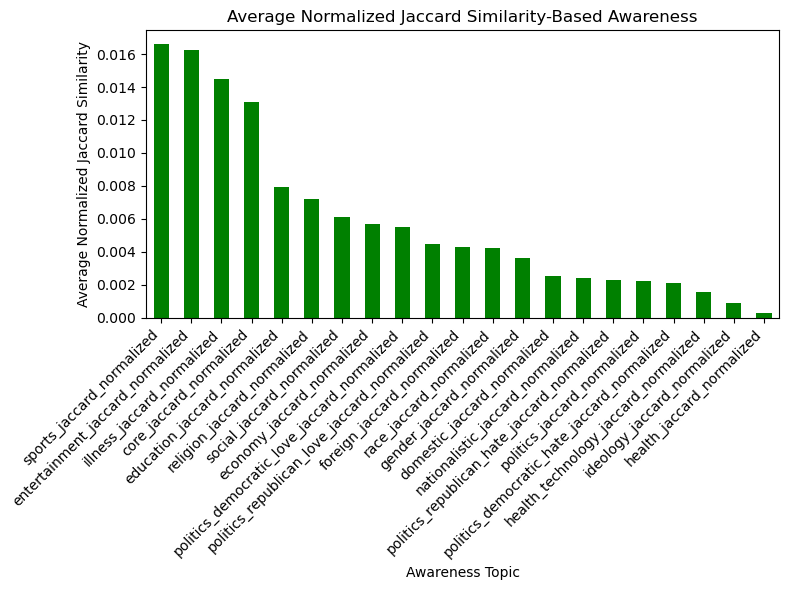

In [33]:
# creating barplot 
plt.figure(figsize=(8, 6))
jacc_avg.plot(kind='bar', color='green')
plt.title('Average Normalized Jaccard Similarity-Based Awareness')
plt.xlabel('Awareness Topic')
plt.ylabel('Average Normalized Jaccard Similarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Jaccard similarity is a quantitative measure of how semantically similar two sets (in this case, tweets) are. The average normalised value we have graphed here gives us insight into the online (Twitter/X) discussion—how often this topic was tweeted about, to what degree did the tweets and subtweets agree or disagree with each other, etc. 

In our dataset, the topics of ‘sports’ and ‘entertainment’ were the most highly discussed. This could be due to both topics being very broad and containing many subtopics and/or during lockdown people were more inclined to remain indoors and spend time on entertainment. Then highly discussed topics include ‘core’ (which is general awareness about COVID-19) and ‘illness’. Again both are general topics. Polical ideologies, policies about healthcare and education were also highly discussed. 


c) Focus on the core_jaccard_normalized variable. Create a bar chart that shows the aggregated mean awareness value for each county. Order the bars from the biggest to the smallest. Which county has the highest awareness? Summarize your observations in around 100 words.

In [34]:
core_jacc_avg = df.groupby('county')['core_jaccard_normalized'].mean().sort_values(ascending=False)


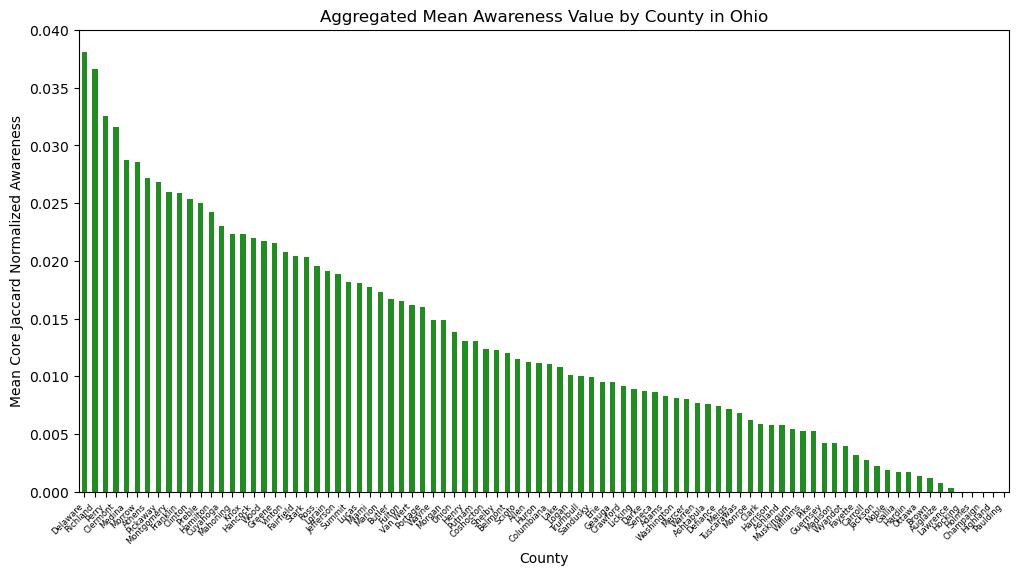

In [35]:
plt.figure(figsize=(12, 6))
core_jacc_avg.plot(kind='bar', color='forestgreen')
plt.title('Aggregated Mean Awareness Value by County in Ohio')
plt.xlabel('County')
plt.ylabel('Mean Core Jaccard Normalized Awareness')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

This bar chart shows the aggregated mean awareness value for each county in Ohio. The values, represented by the height of each bar, are calculated using the Jaccard Normalized Awareness metric. The chart reveals a significant variation in awareness across counties. Delaware County exhibits the highest mean awareness, while several counties at the far right show considerably lower levels, approaching zero. The graph suggests that awareness is not uniformly distributed across Ohio, with some counties demonstrating substantially greater levels than others. 

d) Create two county-level maps of Ohio (an example is provided in the first page of the assignment). Using colors, show the number of average Covid-19 cases per capita and the number of average Covid-19 deaths per capita by county. What are the top-5 counties with high number of per capita cases and per capita number of deaths? Summarize your observations in
around 100 words.

In [36]:
map_gdf = gpd.read_file('County\REFER_COUNTY.shp')

Map is taken from Ohio State Department of Transportation. 
https://tims.dot.state.oh.us/tims/data-glossary/dataset/1a9458e0170e41a0a3b204edb5745e37

In [37]:
map_gdf.rename(columns={'COUNTY': 'county'}, inplace=True)
map_gdf['county'] = map_gdf['county'].str.lower()

In [38]:
per_cap_df = df[['date_index_converted','cases', 'deaths','total_pop','county']]

In [39]:
per_cap_df['county'] = per_cap_df['county'].str.lower()

In [40]:
per_cap_df['cases_per_capita'] = (per_cap_df['cases'] / per_cap_df['total_pop']) * 100000
per_cap_df['deaths_per_capita'] = (per_cap_df['deaths'] / per_cap_df['total_pop']) * 100000

In [41]:
avg_cases = per_cap_df.groupby('county')['cases_per_capita'].mean()
avg_deaths = per_cap_df.groupby('county')['deaths_per_capita'].mean()

In [42]:
merged_cases = pd.merge(map_gdf, avg_cases, on='county', how='right')
merged_deaths = pd.merge(map_gdf, avg_deaths, on='county', how='right') 

<Figure size 1200x1200 with 0 Axes>

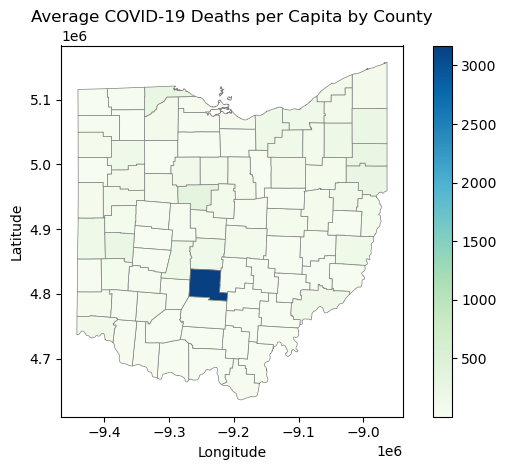

In [43]:
# plot for cases

plt.figure(figsize=(12, 12))
merged_cases.plot(column='cases_per_capita', cmap='GnBu', linewidth=0.5, edgecolor='gray', legend=True,
    missing_kwds={"color": "lightgray"})

plt.title('Average COVID-19 Deaths per Capita by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

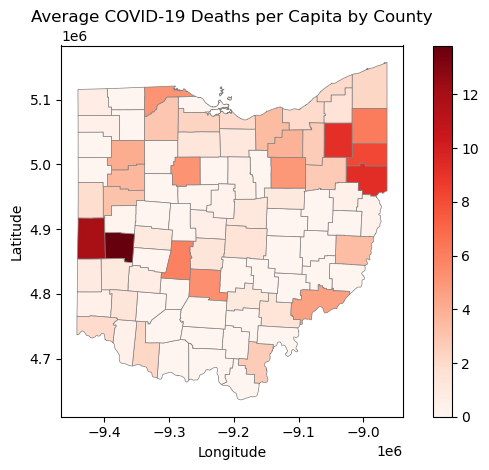

In [44]:
# plot for deaths

plt.figure(figsize=(12, 12))
merged_deaths.plot(column='deaths_per_capita', cmap='Reds', linewidth=0.5, edgecolor='gray', legend=True,
    missing_kwds={"color": "lightgray"})

plt.title('Average COVID-19 Deaths per Capita by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [45]:
#merged_cases.sort_values(by='cases_per_capita', ascending=False).head(5)

In [46]:
#merged_deaths.sort_values(by='deaths_per_capita', ascending=False).head(5)

The top 5 counties with high number of per capita cases are:
1. Pickaway
2. Marion
3. Lucas
4. Columbiana
5. Mahoning

The top 5 counties with high number of per capita deaths are:
1. Miami
2. Darke 
3. Columbiana
4. Portage
5. Mahoning

The maps illustrate the average COVID-19 deaths per capita and the average COVID-19 cases per capita across Ohio counties, using a gradient indicate increasing rates. Counties with high per capita deaths, such as Miami, Darke, Columbiana, Portage, and Mahoning, are represented by darker red hues. Interestingly, while Columbiana and Mahoning appear in both high case and high death lists, other counties like Pickaway and Lucas, known for high per capita cases, don't show similarly high death rates on this map. This suggests that high case counts don't directly translate to high death rates in all counties.

e) Calculate the average normalized Jaccard awareness scores for every day (starting from Day 1). Create a line chart with overlapping lines in which each line represents the evolution of awareness levels for each topic.4 The x-axis of the line chart should correspond to ‘Days’, and the y-axis of the line chart should represent the level of awareness. What are the trends in the graph? Summarize your observations in around 100 words.

In [47]:
#extracting day from date_index_converted col to order chronologically
def sort_day(day_list):

    def extract_day(day_string):
        return int(day_string.split('_')[1])  # Extract the number after 'day_'

    return sorted(day_list, key=extract_day)

In [48]:
jaccard_cols = [col for col in df.columns if 'jaccard_normalized' in col]
daily_awareness = df.groupby('date_index_converted')[jaccard_cols].mean().reset_index()

In [49]:
sorted_days = sort_day(daily_awareness['date_index_converted'].tolist())

In [50]:
daily_awareness['date_index_converted_ordered'] = pd.Categorical(daily_awareness['date_index_converted'], categories=sorted_days, ordered=True)

In [51]:
awareness_by_day = daily_awareness.sort_values(by='date_index_converted_ordered')

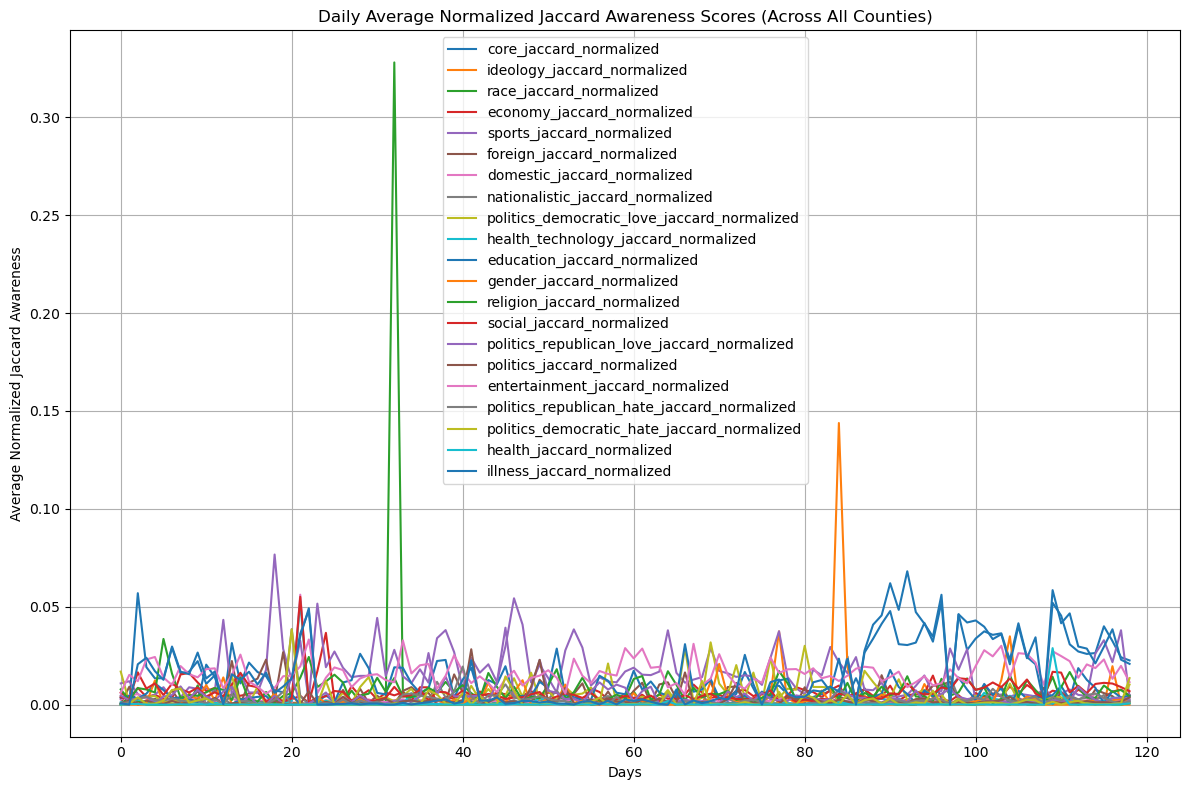

In [52]:
plt.figure(figsize=(12, 8))

for topic in jaccard_cols:
    plt.plot(daily_awareness.index, daily_awareness[topic], label=topic)

plt.title('Daily Average Normalized Jaccard Awareness Scores (Across All Counties)')
plt.xlabel('Days')
plt.ylabel('Average Normalized Jaccard Awareness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph depicts the daily average normalized Jaccard awareness scores across all counties for various topics, spanning approximately 120 days. Most topics exhibit relatively low and stable scores, close to zero, indicating minimal daily fluctuation. However, there are a few notable spikes indicating increased "awareness" on the internet.

"Health_technology_jaccard_normalized" shows a sharp peak around day 30, suggesting a significant, but temporary, surge in awareness.  Similarly, "entertainment_jaccard_normalized" peaks around day 80, demonstrating a short-lived period of heightened interest.

## Other Analysis

In [53]:
cases_by_day = df.groupby('date_index_converted')['cases'].sum().reset_index()

In [54]:
sorted_days = sort_day(cases_by_day['date_index_converted'].tolist())
cases_by_day['date_index_converted_ordered'] = pd.Categorical(cases_by_day['date_index_converted'], categories=sorted_days, ordered=True)
cases_by_day = cases_by_day.sort_values(by='date_index_converted_ordered')

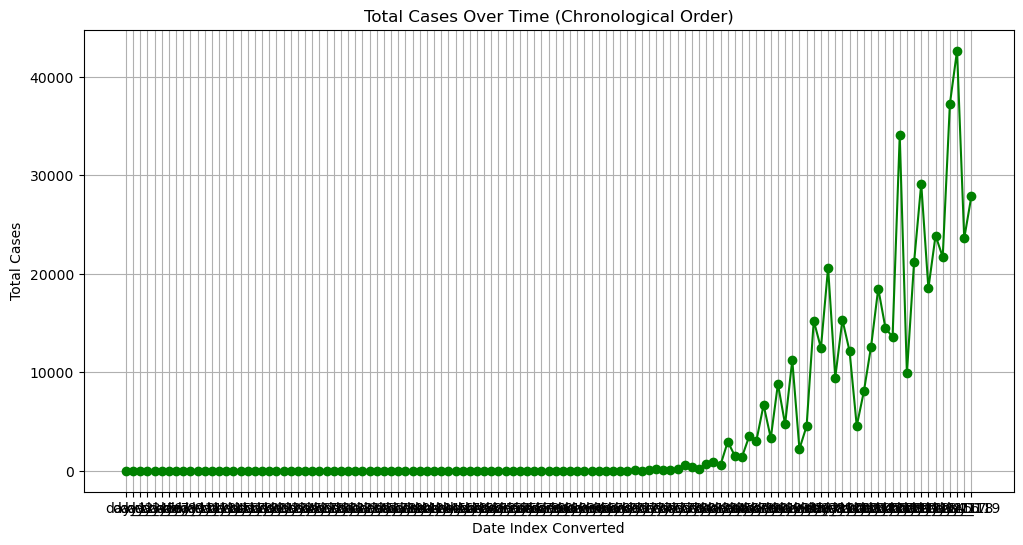

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(cases_by_day['date_index_converted'], cases_by_day['cases'], color='green', marker='o')
plt.title('Total Cases Over Time (Chronological Order)')
plt.xlabel('Date Index Converted')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

In [56]:
print(cases_by_day[cases_by_day['cases'] == 0])

   date_index_converted  cases date_index_converted_ordered
0                 day_1      0                        day_1
31                day_2      0                        day_2
42                day_3      0                        day_3
53                day_4      0                        day_4
64                day_5      0                        day_5
..                  ...    ...                          ...
83               day_67      0                       day_67
84               day_68      0                       day_68
85               day_69      0                       day_69
87               day_70      0                       day_70
90               day_73      0                       day_73

[71 rows x 3 columns]


# Prediction

In [57]:
df = pd.read_csv('training_data.csv')
y = df['cases']
X = df.drop('cases', axis=1)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['county'] = le.fit_transform(X['county'])
X['date_index_converted'] = X['date_index_converted'].str.extract('(\d+)').astype(int)

In [59]:
# columns_to_drop = []

# for col in X.columns:
#     if any(metric in col for metric in ['jaccard', 'cosine', 'intersection']) \
#        and 'normalized' not in col:
#         columns_to_drop.append(col)

# print(f"Dropping {len(columns_to_drop)} non-normalized similarity features.")

# # Actually drop them
# X_clean = X.drop(columns=columns_to_drop)

# print(f"Original shape: {X.shape}")
# print(f"Reduced shape: {X_clean.shape}")

### 

In [60]:
X_clean = X

In [61]:
def drop_high_corr_features(df, threshold=0.99):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop), to_drop

X_clean, dropped = drop_high_corr_features(X_clean.select_dtypes(include='number'))
X_clean.shape

(3141, 56)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [63]:
def force_non_negative_integer(preds):
    return np.maximum(0, np.round(preds)).astype(int)

In [64]:
#knn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [65]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    learning_rate=0.3,
    max_depth=13,
    min_child_weight=3,
    n_estimators=200,
    reg_alpha = 0.1,
    random_state=42,
    early_stopping_rounds = 50
    )

xgb.fit(
X_train, y_train,
eval_set=[(X_test, y_test)],
verbose=0
)


#values can only be non negative whole numbers
y_pred = xgb.predict(X_test)
# y_pred = np.round(np.clip(y_pred, 0, None))


print(f"Rounded XGBoost R^2 Score: {r2_score(y_test, y_pred):.4f}")

Rounded XGBoost R^2 Score: 0.9455


<Figure size 1200x800 with 0 Axes>

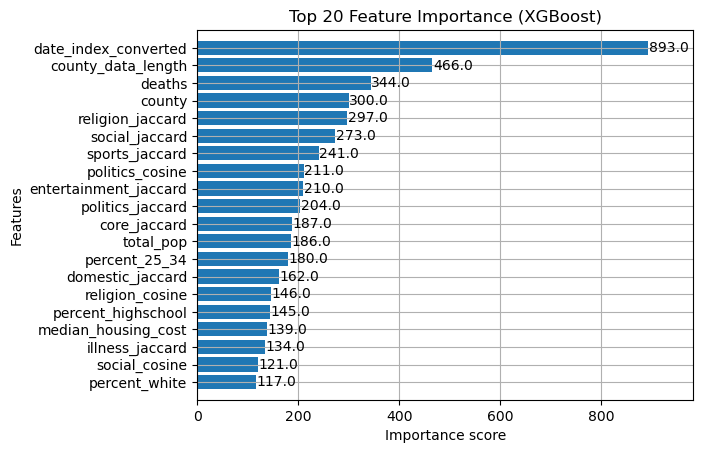

In [66]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb, importance_type='weight', max_num_features=20, height=0.8)
plt.title("Top 20 Feature Importance (XGBoost)")
plt.show()


## Importing Test Data

In [67]:
test_df = pd.read_csv('./test_data.csv')
test_df['county'] = le.transform(test_df['county'])
test_df['date_index_converted'] = test_df['date_index_converted'].str.extract('(\d+)').astype(int)
test_df_X = test_df[X_train.columns]

In [68]:
#predictions
test_preds = xgb.predict(test_df_X)
test_preds = np.round(np.clip(test_preds, 0, None))
test_df['preds'] = test_preds

In [69]:
test_df.rename(columns={'index': 'Index'}, inplace=True)
test_df.set_index(keys='Index', inplace=True)
test = test_df[['preds']]
test.head()

,preds
Index,
0,0.0
1,335.0
2,0.0
3,0.0
4,1.0


In [70]:
test.to_csv('./results_xgb.csv')
